# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

In [4]:
from google.colab import auth
auth.authenticate_user()


# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


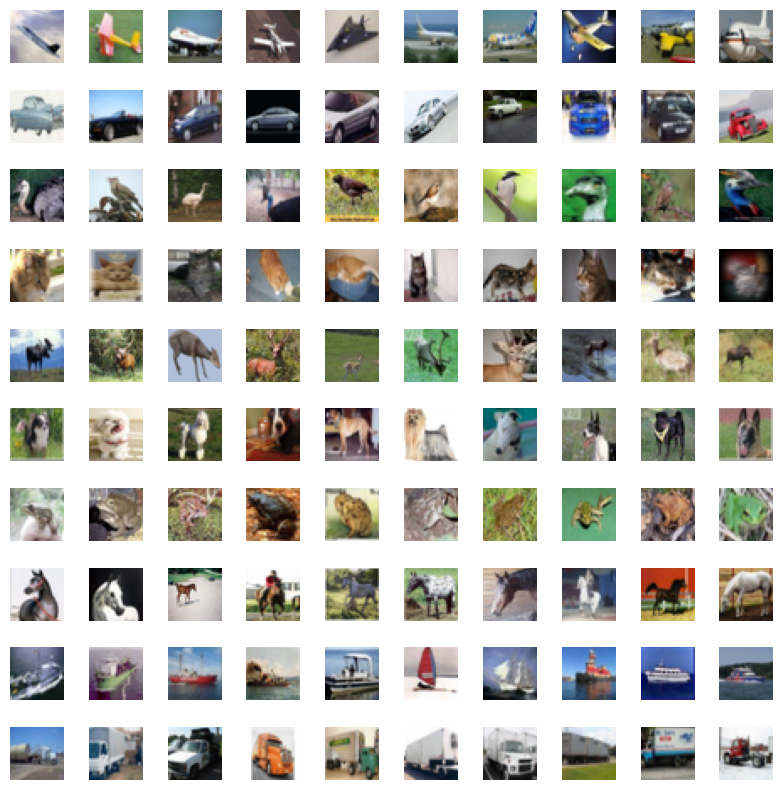

In [8]:
# Your code here :


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

for i in range(10):
    class_indices = np.where(y_train.flatten() == i)[0]
    random_indices = np.random.choice(class_indices, 10, replace=False)
    for j, img_idx in enumerate(random_indices):
        axes[i, j].imshow(x_train[img_idx])
        axes[i, j].axis('off')
    axes[i, 0].set_ylabel(class_names[i], fontsize=12, rotation=90, labelpad=10)

plt.show()


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [9]:
from keras.backend import clear_session
clear_session()

In [10]:
# Your code here : import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session

clear_session()

model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
# Your code here :
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.1697 - loss: 2.2638 - val_accuracy: 0.2312 - val_loss: 2.1565
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2684 - loss: 2.1213 - val_accuracy: 0.2800 - val_loss: 2.0345
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3066 - loss: 2.0043 - val_accuracy: 0.3185 - val_loss: 1.9497
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3284 - loss: 1.9329 - val_accuracy: 0.3243 - val_loss: 1.9229
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3422 - loss: 1.8986 - val_accuracy: 0.3378 - val_loss: 1.8845
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3516 - loss: 1.8657 - val_accuracy: 0.3634 - val_loss: 1.8467
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3641 - loss: 1.8352 - val_accuracy: 0.3541 - val_loss: 1.8276
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3702 - loss: 1.8097 - val_accuracy: 0.3728 - v

*   Plot the cross entropy loss curve and the accuracy curve

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5649 - loss: 1.2516 - val_accuracy: 0.5239 - val_loss: 1.3456
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5655 - loss: 1.2493 - val_accuracy: 0.5533 - val_loss: 1.2639
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5735 - loss: 1.2194 - val_accuracy: 0.5321 - val_loss: 1.3350
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5681 - loss: 1.2389 - val_accuracy: 0.5603 - val_loss: 1.2587
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5735 - loss: 1.2239 - val_accuracy: 0.5591 - val_loss: 1.2525
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5703 - loss: 1.2290 - val_accuracy: 0.5492 - val_loss: 1.2654
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5807 - loss: 1.2067 - val_accuracy: 0.5629 - val_loss: 1.2404
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5777 - loss: 1.2125 - val_accuracy: 0.5649 - v

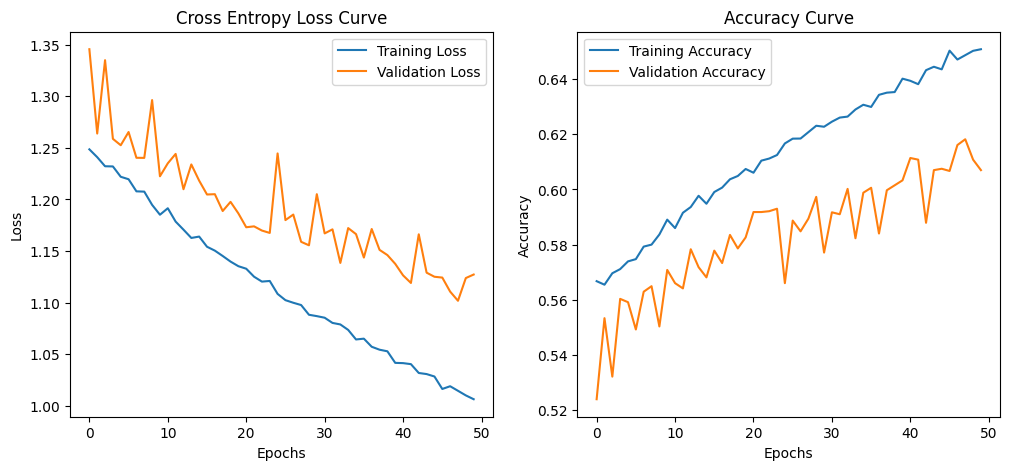

In [12]:
# Your code here :
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [13]:
from keras.backend import clear_session
clear_session()

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.1412 - loss: 2.2791 - val_accuracy: 0.2342 - val_loss: 2.1737
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2468 - loss: 2.1264 - val_accuracy: 0.2958 - val_loss: 1.9914
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2860 - loss: 2.0014 - val_accuracy: 0.3232 - val_loss: 1.9117
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3204 - loss: 1.9259 - val_accuracy: 0.3510 - val_loss: 1.8536
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3414 - loss: 1.8686 - val_accuracy: 0.3482 - val_loss: 1.8409
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3573 - loss: 1.8239 - val_accuracy: 0.3876 - val_loss: 1.7639
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3745 - loss: 1.7815 - val_accuracy: 0.3910 - val_loss: 1.7390
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3882 - loss: 1.7414 - val_accuracy: 0.3967 - 

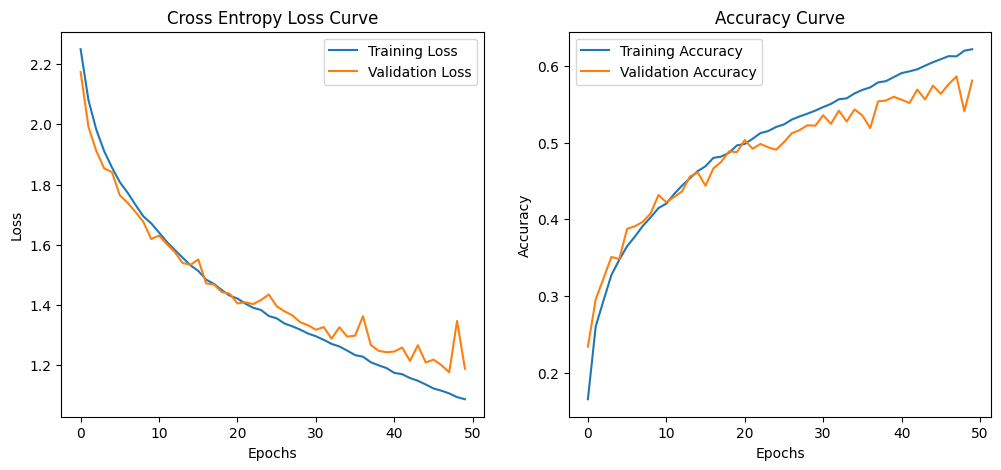

In [14]:
# Your code here :
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

clear_session()

model_vgg = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_vgg.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

history_vgg = model_vgg.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['loss'], label='Training Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [15]:
# Your code here :
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model_vgg.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

history_vgg = model_vgg.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6242 - loss: 1.0731 - val_accuracy: 0.5823 - val_loss: 1.1897
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6256 - loss: 1.0734 - val_accuracy: 0.5761 - val_loss: 1.1960
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6265 - loss: 1.0810 - val_accuracy: 0.5876 - val_loss: 1.1558
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6461 - loss: 1.0329 - val_accuracy: 0.5926 - val_loss: 1.1553
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6421 - loss: 1.0365 - val_accuracy: 0.5813 - val_loss: 1.1716
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6418 - loss: 1.0323 - val_accuracy: 0.6003 - val_loss: 1.1335
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6449 - loss: 1.0145 - val_accuracy: 0.5816 - val_loss: 1.1963
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6487 - loss: 1.0153 - val_accuracy: 0.5837 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.1741 - loss: 2.2561 - val_accuracy: 0.2551 - val_loss: 2.1370
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2775 - loss: 2.0988 - val_accuracy: 0.2980 - val_loss: 2.0120
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3081 - loss: 1.9925 - val_accuracy: 0.3042 - val_loss: 1.9521
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3251 - loss: 1.9348 - val_accuracy: 0.3391 - val_loss: 1.9065
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3393 - loss: 1.8976 - val_accuracy: 0.3372 - val_loss: 1.8893
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3466 - loss: 1.8730 - val_accuracy: 0.3477 - val_loss: 1.8551
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3549 - loss: 1.8466 - val_accuracy: 0.3595 - val_loss: 1.8357
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3693 - loss: 1.8149 - val_accuracy: 0.3702 - v

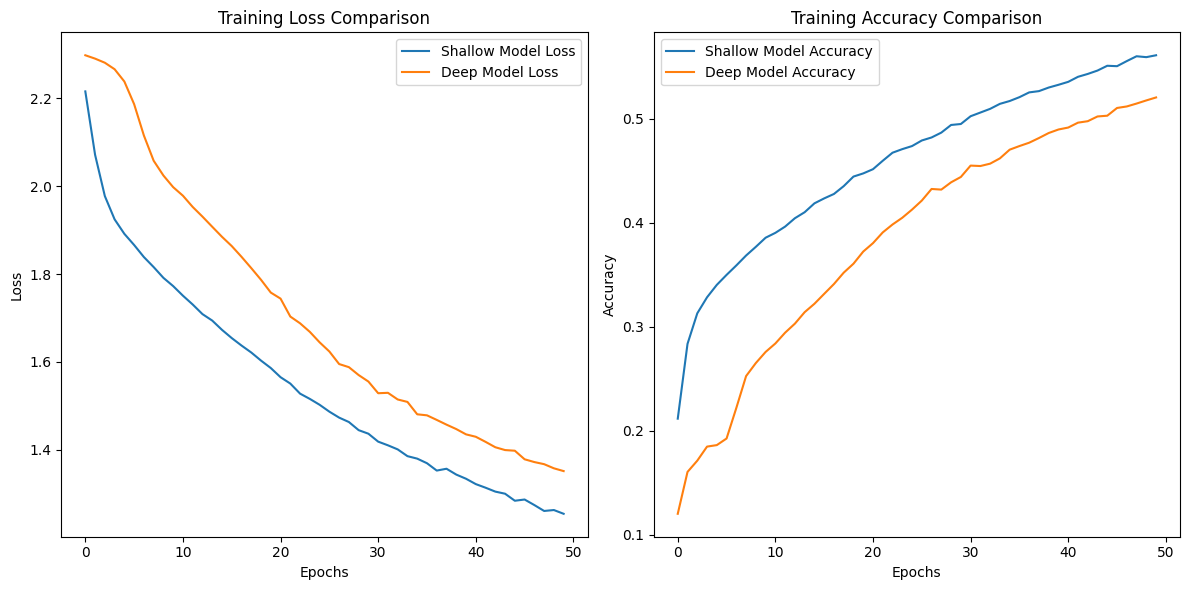

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the image data to range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define Shallow Model
def shallow_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Define Deep Model
def deep_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Compile both models
shallow_model = shallow_model()
shallow_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

deep_model = deep_model()
deep_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train both models for 50 epochs with batch size of 512
history_shallow = shallow_model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test))
history_deep = deep_model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test))

# Plotting Loss and Accuracy Curves
plt.figure(figsize=(12, 6))

# Training Loss for both models
plt.subplot(1, 2, 1)
plt.plot(history_shallow.history['loss'], label='Shallow Model Loss')
plt.plot(history_deep.history['loss'], label='Deep Model Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training Accuracy for both models
plt.subplot(1, 2, 2)
plt.plot(history_shallow.history['accuracy'], label='Shallow Model Accuracy')
plt.plot(history_deep.history['accuracy'], label='Deep Model Accuracy')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


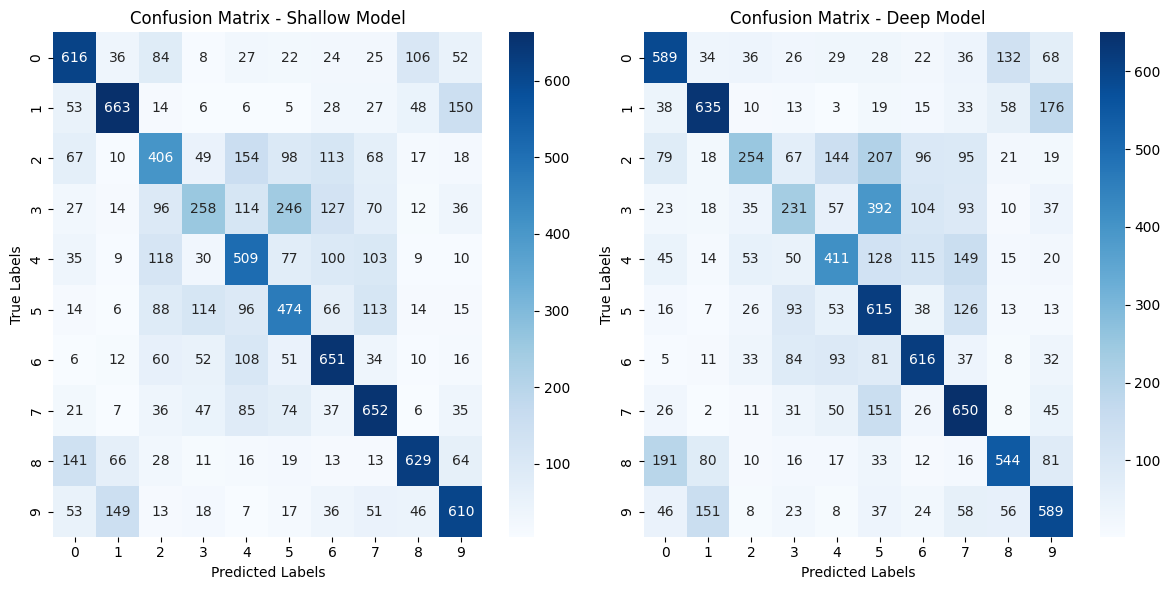

In [24]:
# Your code here :
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set using the shallow model
y_pred_shallow = shallow_model.predict(X_test)
y_pred_deep = deep_model.predict(X_test)

# Convert predictions to the class with the highest probability
y_pred_shallow_classes = y_pred_shallow.argmax(axis=1)
y_pred_deep_classes = y_pred_deep.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Compute confusion matrix for both models
cm_shallow = confusion_matrix(y_true_classes, y_pred_shallow_classes)
cm_deep = confusion_matrix(y_true_classes, y_pred_deep_classes)

# Plotting confusion matrix for shallow model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_shallow, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Shallow Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Plotting confusion matrix for deep model
plt.subplot(1, 2, 2)
sns.heatmap(cm_deep, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Deep Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [25]:
# Your code here :
# Evaluate the test accuracy for both models
test_loss_shallow, test_acc_shallow = shallow_model.evaluate(X_test, y_test)
test_loss_deep, test_acc_deep = deep_model.evaluate(X_test, y_test)

# Print the test accuracies for both models
print(f"Test Accuracy - Shallow Model: {test_acc_shallow * 100:.2f}%")
print(f"Test Accuracy - Deep Model: {test_acc_deep * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5475 - loss: 1.2707
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5206 - loss: 1.3598
Test Accuracy - Shallow Model: 54.68%
Test Accuracy - Deep Model: 51.34%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [27]:
from keras.backend import clear_session
clear_session()

In [26]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import backend as K

# Clear any previous session to avoid clutter
K.clear_session()

# Define the VGG architecture
def vgg_model():
    model = Sequential()

    # First block: Two convolutional layers with 64 filters
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second block: Two convolutional layers with 128 filters
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third block: Two convolutional layers with 256 filters
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Add a dense layer with 128 units
    model.add(Dense(128, activation='relu'))

    # Output classification layer (for 10 classes, change as needed)
    model.add(Dense(10, activation='softmax'))

    return model

# Instantiate the model
vgg = vgg_model()

# Print the model summary to verify the architecture
vgg.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.1139 - loss: 2.3000 - val_accuracy: 0.1363 - val_loss: 2.2805
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.1723 - loss: 2.2478 - val_accuracy: 0.2121 - val_loss: 2.0786
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2326 - loss: 2.0598 - val_accuracy: 0.2806 - val_loss: 1.9795
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2746 - loss: 1.9629 - val_accuracy: 0.3020 - val_loss: 1.8695
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3104 - loss: 1.8652 - val_accuracy: 0.3421 - val_loss: 1.8067
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3353 - loss: 1.7995 - val_accuracy: 0.3582 - val_loss: 1.7439
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3556 - loss: 1.7480 - val_accuracy: 0.3875 - val_loss: 1.6578
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3839 - loss: 1.6704 - val_accuracy: 0.4049 -

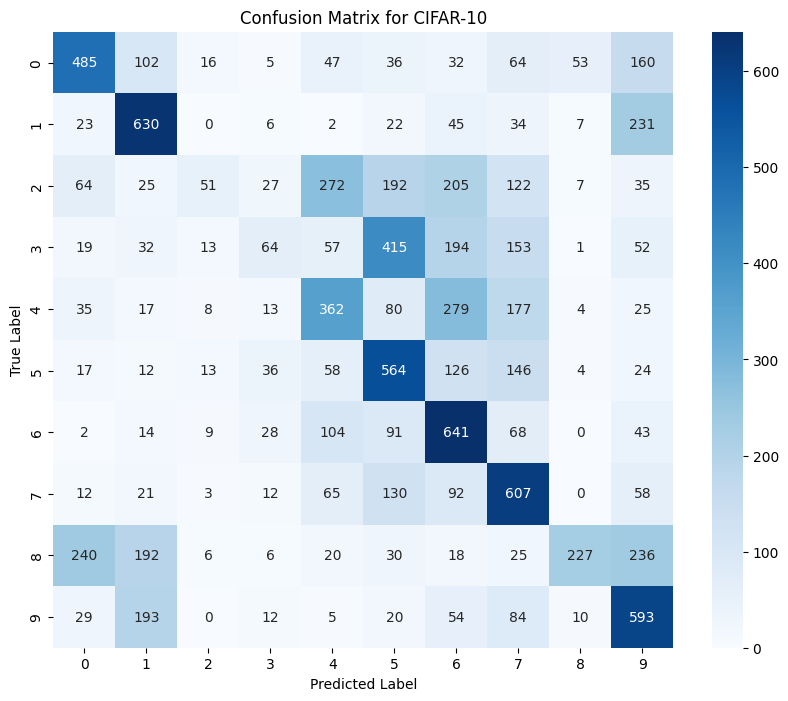

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CIFAR-10')
plt.show()


# Understanding deep networks

*   What is the use of activation functions in a network? Why is it needed?

Activation functions introduce non-linearity into the network, enabling it to learn complex patterns and make non-linear decisions.

*   What is the difference between sigmoid activation and softmax activation?

Sigmoid is used for binary classification, outputting values between 0 and 1.
Softmax is used for multi-class classification, converting logits into probabilities that sum to 1, making it easier to determine the most likely class.
*  What is the difference between categorical crossentropy and binary crossentropy loss?

Binary crossentropy is used for binary classification (two classes).
Categorical crossentropy is used for multi-class classification with one-hot encoded labels.

**Write the answers below :**

1 - Use of activation functions:

_ Activation functions introduce non-linearity into the network, allowing it to learn complex patterns and make non-linear decisions. Without them, the network would behave like a simple linear model. _

2 - Key Differences between sigmoid and softmax:

_ Sigmoid is used for binary classification, mapping values between 0 and 1, while Softmax is used for multi-class classification, converting logits into probabilities that sum to 1, helping determine the most probable class. _

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

_ Binary crossentropy is used for two-class classification problems, while categorical crossentropy is used for multi-class classification with one-hot encoded labels


_
